In [6]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
import math
import plotly.graph_objs as go
import plotly.io as pio
from sklearn.svm import SVR
import warnings

warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('Dữ-liệu-Lịch-sử-ACB.csv',delimiter=';')
df.set_index('Date', inplace=True)
df

,Price,Open,High,Low,Volume,Change
Date,,,,,,
02/01/2018,"11615,4","11076,6","11645,3","11016,7",12.22M,5.15%
03/01/2018,"11585,5","11615,4","11705,2","11375,9",16.89M,-0.26%
04/01/2018,"11615,4","11585,5","11645,3","11495,7",21.26M,0.26%
05/01/2018,"11615,4","11675,3",11825,"11495,7",21.56M,0.00%
08/01/2018,"12004,6","11615,4","12004,6","11615,4",12.96M,3.35%
...,...,...,...,...,...,...
11/12/2023,22400,22450,22500,22250,2.27M,0.00%
12/12/2023,22500,22450,22500,22300,3.23M,0.45%
13/12/2023,22300,22500,22550,22300,3.93M,-0.89%


In [9]:
def custom_float_conversion(value):
    try:
        # Replace commas with dots and convert to float
        cleaned_value = float(value.replace(',', '.'))
        return cleaned_value
    except (ValueError, AttributeError):
        return np.nan
df['Price']=df['Price'].apply(custom_float_conversion)

In [10]:
count = df['Price'].count()
minimum = df['Price'].min()
maximum = df['Price'].max()
q1 = df['Price'].quantile(0.25)
median = df['Price'].median()
q3 = df['Price'].quantile(0.75)
mean_value = df['Price'].mean() 
std_dev = df['Price'].std()
sem = df['Price'].sem()
sample_var = df['Price'].var()
kurt = kurtosis(df['Price'])
skewness = skew(df['Price'])
data_sum = df['Price'].sum()
mode_value = df['Price'].mode().values[0]
print(f"Count: \t\t{count}")
print(f"Minimum: \t{minimum}")
print(f"Maximum: \t{maximum}")
print(f"Mean: \t\t{mean_value}")
print(f"Q1: \t\t{q1}")
print(f"Median (Q2): \t{median}")
print(f"Q3: \t\t{q3}")
print(f"Standard Error: \t{sem}")
print(f"Standard Deviation: \t{std_dev}")
print(f"Sample Variance: \t{sample_var}")
print(f"Kurtosis: \t\t{kurt}")
print(f"Skewness: \t\t{skewness}")
print(f"Sum: \t\t\t{data_sum}")
print(f"Mode: \t\t\t{mode_value}")

Count: 		1485
Minimum: 	8763.1
Maximum: 	30360.0
Mean: 		18120.167003367
Q1: 		11667.7
Median (Q2): 	17856.0
Q3: 		24200.0
Standard Error: 	161.96694048746
Standard Deviation: 	6241.509061848711
Sample Variance: 	38956435.369139574
Kurtosis: 		-1.6164807130014756
Skewness: 		0.1276233286932018
Sum: 			26908448.0
Mode: 			22000.0


<Axes: xlabel='Date'>

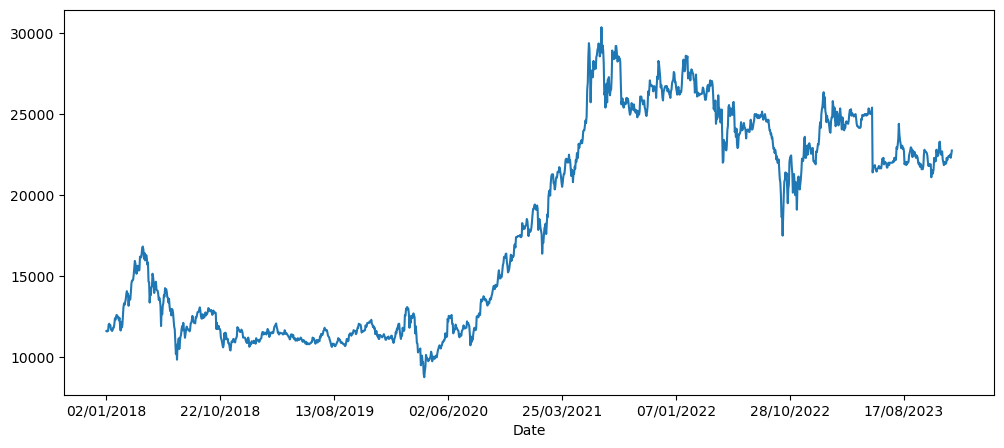

In [14]:
df['Price'].plot(figsize=(12,5))

Text(0.5, 1.0, 'ACB open price')

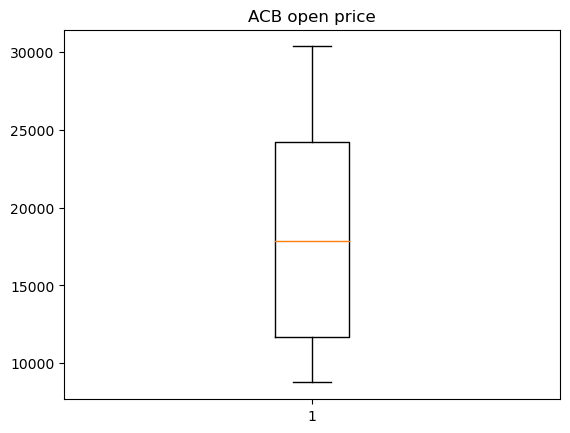

In [13]:
plt.boxplot(df['Price'])
plt.title('ACB open price')

Text(0, 0.5, 'Frequency')

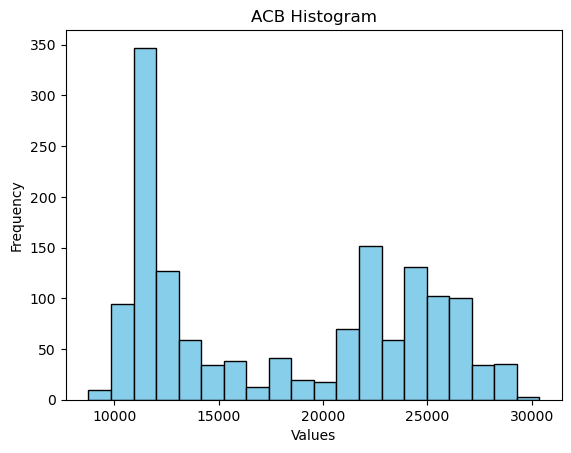

In [12]:
plt.hist(df.Price, bins=20, color='skyblue', edgecolor='black')
plt.title('ACB Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')